# Timing-associated geneset analysis with cellfategenie

In our single-cell analysis, we analyse the underlying temporal state in the cell, which we call pseudotime. and identifying the genes associated with pseudotime becomes the key to unravelling models of gene dynamic regulation. In traditional analysis, we would use correlation coefficients, or gene dynamics model fitting. The correlation coefficient approach will have a preference for genes at the beginning and end of the time series, and the gene dynamics model requires RNA velocity information. Unbiased identification of chronosequence-related genes, as well as the need for no additional dependency information, has become a challenge in current chronosequence analyses.

Here, we developed CellFateGenie, which first removes potential noise from the data through metacells, and then constructs an adaptive ridge regression model to find the minimum set of genes needed to satisfy the timing fit.CellFateGenie has similar accuracy to gene dynamics models while eliminating preferences for the start and end of the time series.

We provided the AUCell to evaluate the geneset of adata

Colab_Reproducibility：https://colab.research.google.com/drive/1upcKKZHsZMS78eOliwRAddbaZ9ICXSrc?usp=sharing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import omicverse as ov
import scvelo as scv
import matplotlib.pyplot as plt
ov.plot_set(font_path='Arial')
!date

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5
✅ [GPU 1] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 08月 05日 星期二 10:31:18 CST


## Data preprocessed

We using dataset of dentategyrus in scvelo to demonstrate the timing-associated genes analysis. Firstly, We use `ov.pp.qc` and `ov.pp.preprocess` to preprocess the dataset.

Then we use `ov.pp.scale` and `ov.pp.pca` to analysis the principal component of the data

In [3]:
adata=ov.read('data/tutorial_meta_den.h5ad')
adata=adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 200 × 13118
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    uns: 'REFERENCE_MANU', 'celltype_colors', 'hvg', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'status', 'status_args', 'umap'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca'
    obsp: 'connectivities', 'distances'

## Genesets evaluata

In [4]:
import omicverse as ov
ov.utils.download_pathway_database()
pathway_dict=ov.utils.geneset_prepare('genesets/GO_Biological_Process_2021.txt',organism='Mouse')
len(pathway_dict.keys())

......Pathway Geneset download start: GO_Biological_Process_2021
......Loading dataset from genesets/GO_Biological_Process_2021.txt
......Pathway Geneset download start: GO_Cellular_Component_2021
......Loading dataset from genesets/GO_Cellular_Component_2021.txt
......Pathway Geneset download start: GO_Molecular_Function_2021
......Loading dataset from genesets/GO_Molecular_Function_2021.txt
......Pathway Geneset download start: WikiPathway_2021_Human
......Loading dataset from genesets/WikiPathway_2021_Human.txt
......Pathway Geneset download start: WikiPathways_2019_Mouse
......Loading dataset from genesets/WikiPathways_2019_Mouse.txt
......Pathway Geneset download start: Reactome_2022
......Loading dataset from genesets/Reactome_2022.txt
......Pathway Geneset download finished!
......Other Genesets can be dowload in `https://maayanlab.cloud/Enrichr/#libraries`


6036

In [5]:
##Assest all pathways
adata_aucs=ov.single.pathway_aucell_enrichment(adata,
                                                pathways_dict=pathway_dict,
                                                num_workers=8)

ctxcore have been install version: 0.2.0


100%|██████████| 200/200 [00:00<00:00, 1182.95it/s]


Computing AUC scores for 6036 pathways using 8 workers...
Splitting 6036 pathways into 8 chunks of ~755 pathways each...
Starting parallel pathway processing...


Less than 80% of the genes in 3'-phosphoadenosine 5'-phosphosulfate metabolic process (GO:0050427) are present in the expression matrix.
Less than 80% of the genes in 3'-UTR-mediated mRNA stabilization (GO:0070935) are present in the expression matrix.
Less than 80% of the genes in acetylcholine receptor signaling pathway (GO:0095500) are present in the expression matrix.
Less than 80% of the genes in acid secretion (GO:0046717) are present in the expression matrix.
Less than 80% of the genes in actin filament bundle assembly (GO:0051017) are present in the expression matrix.
Less than 80% of the genes in actin filament bundle organization (GO:0061572) are present in the expression matrix.
Less than 80% of the genes in actin filament capping (GO:0051693) are present in the expression matrix.
Less than 80% of the genes in actin filament network formation (GO:0051639) are present in the expression matrix.
Less than 80% of the genes in actin filament organization (GO:0007015) are present 

Parallel processing completed!
AUC calculation completed! Generated scores for 6036 pathways across 200 cells.


In [6]:
adata_aucs.obs=adata[adata_aucs.obs.index].obs
adata_aucs.obsm=adata[adata_aucs.obs.index].obsm
adata_aucs.obsp=adata[adata_aucs.obs.index].obsp
adata_aucs.uns=adata[adata_aucs.obs.index].uns

adata_aucs

AnnData object with n_obs × n_vars = 200 × 6036
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    uns: 'REFERENCE_MANU', 'celltype_colors', 'hvg', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'status', 'status_args', 'umap'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca'
    obsp: 'connectivities', 'distances'

## Timing-associated genes analysis

We have encapsulated the cellfategenie algorithm into omicverse, and we can simply use omicverse to analysis.

In [8]:
cfg_obj=ov.single.Fate(adata_aucs,pseudotime='pt_via')
cfg_obj.model_init()

$MSE|RMSE|MAE|R^2$:0.011|0.1|0.077|0.89


,coef,abs(coef),values
Regulon,,,
Golgi disassembly (GO:0090166),0.067457,0.067457,0.075761
activation of cysteine-type endopeptidase activity involved in apoptotic process by cytochrome c (GO:0008635),-0.060009,0.060009,0.322783
oxygen homeostasis (GO:0032364),-0.058975,0.058975,0.236921
chromatin organization involved in negative regulation of transcription (GO:0097549),0.058216,0.058216,0.116995
positive regulation of Arp2/3 complex-mediated actin nucleation (GO:2000601),0.051815,0.051815,0.346380
...,...,...,...
negative regulation of peptidase activity (GO:0010466),0.000000,0.000000,0.000000
negative regulation of pathway-restricted SMAD protein phosphorylation (GO:0060394),0.000000,0.000000,0.000000
negative regulation of oxidoreductase activity (GO:0051354),0.000000,0.000000,0.000000


We used Adaptive Threshold Regression to calculate the minimum number of gene sets that would have the same accuracy as the regression model constructed for all genes.

In [9]:
cfg_obj.ATR(stop=500)

  8%|▊         | 499/6035 [00:03<00:35, 154.99it/s]

coef_threshold:0.03175422176718712, r2:0.8810214517451791


,coef_threshold,r2
0,0.060009,-0.306622
1,0.058975,-0.169910
2,0.058216,-0.154824
3,0.051815,0.543729
4,0.051790,0.548848
...,...,...
495,0.017166,0.904403
496,0.017159,0.904293
497,0.017158,0.904266
498,0.017158,0.904246


Text(0.5, 1.0, 'Dentategyrus Metacells\nCellFateGenie')

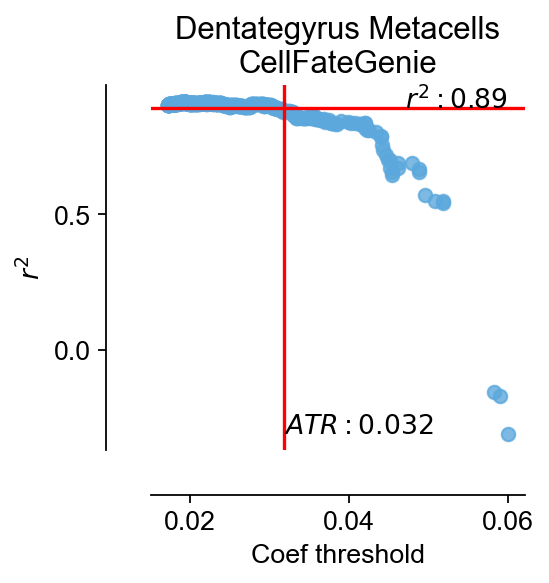

In [10]:
fig,ax=cfg_obj.plot_filtering(color='#5ca8dc')
ax.set_title('Dentategyrus Metacells\nCellFateGenie')

In [11]:
res=cfg_obj.model_fit()

$MSE|RMSE|MAE|R^2$:0.013|0.11|0.087|0.87


## Visualization

We prepared a series of function to visualize the result. we can use `plot_color_fitting` to observe the different cells how to transit with the pseudotime.

(<Figure size 240x240 with 1 Axes>,
 <Axes: title={'center': 'Regression RNA\nDimension: 6036'}, xlabel='True pseudotime', ylabel='Predicted pseudotime'>)

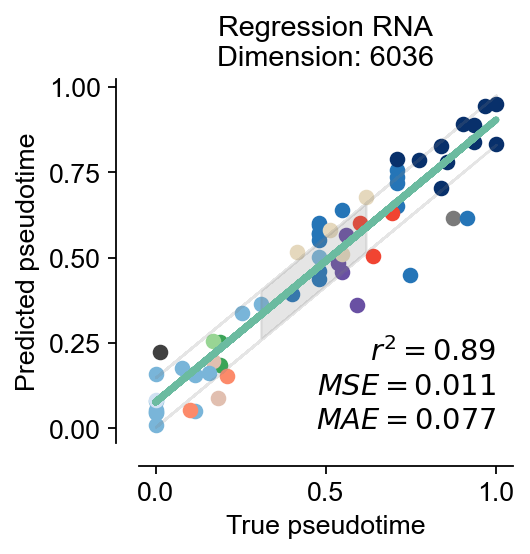

In [12]:
cfg_obj.plot_color_fitting(type='raw',cluster_key='celltype')

(<Figure size 240x240 with 1 Axes>,
 <Axes: title={'center': 'Regression RNA\nDimension: 82'}, xlabel='True pseudotime', ylabel='Predicted pseudotime'>)

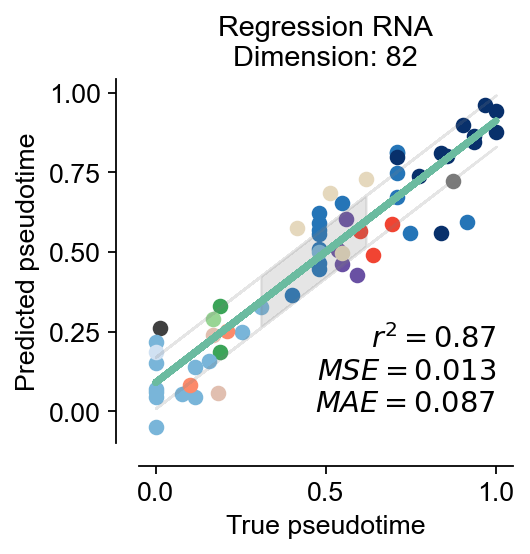

In [13]:
cfg_obj.plot_color_fitting(type='filter',cluster_key='celltype')

## Kendalltau test

We can further narrow down the set of genes that satisfy the maximum regression coefficient. We used the kendalltau test to calculate the trend significance for each gene.

In [14]:
kt_filter=cfg_obj.kendalltau_filter()
kt_filter.head()

,kendalltau_sta,pvalue
retrograde axonal transport (GO:0008090),0.557242,6.089678e-31
protein localization to basolateral plasma membrane (GO:1903361),0.324701,1.586751e-11
positive regulation of actin nucleation (GO:0051127),0.543989,1.446510e-29
calcium ion-regulated exocytosis of neurotransmitter (GO:0048791),0.492134,2.048743e-24
glycerolipid metabolic process (GO:0046486),0.553485,1.734871e-30


In [15]:
var_name=kt_filter.loc[kt_filter['pvalue']<kt_filter['pvalue'].mean()].index.tolist()
gt_obj=ov.single.gene_trends(adata_aucs,'pt_via',var_name)
gt_obj.calculate(n_convolve=10)

In [16]:
print(f"Dimension: {len(var_name)}")

Dimension: 63


Text(0.5, 1.0, 'Dentategyrus meta\nCellfategenie')

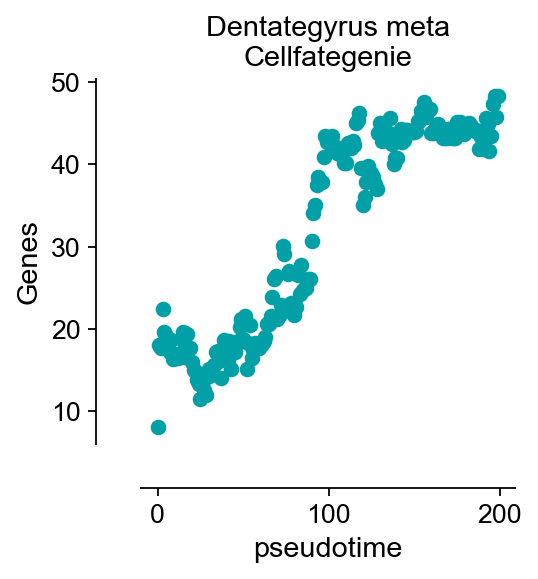

In [17]:
fig,ax=gt_obj.plot_trend(color=ov.utils.blue_color[3])
ax.set_title(f'Dentategyrus meta\nCellfategenie',fontsize=13)

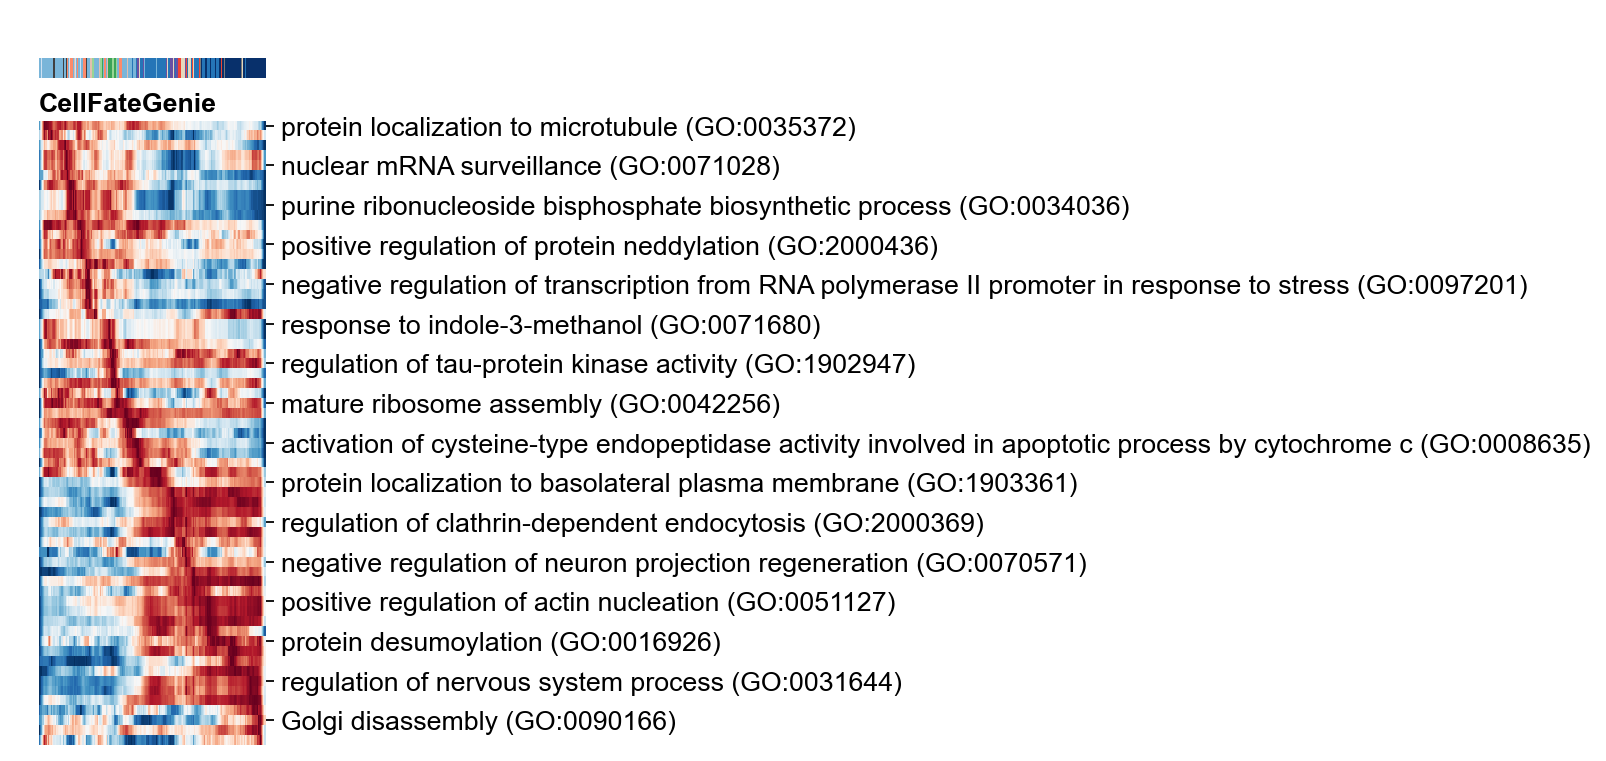

In [18]:
g=ov.utils.plot_heatmap(adata_aucs,var_names=var_name,
                  sortby='pt_via',col_color='celltype',
                 n_convolve=10,figsize=(1,6),show=False)

g.fig.set_size_inches(2, 6)
g.fig.suptitle('CellFateGenie',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)
plt.show()

In [20]:
gw_obj1=ov.utils.geneset_wordcloud(adata=adata_aucs[:,var_name],
                                  cluster_key='celltype',pseudotime='pt_via',figsize=(3,6))
gw_obj1.get()

Granule immature 300 19
Neuroblast 300 9
Granule mature 300 57
OPC 300 47
Mossy 300 85
OL 300 66
Radial Glia-like 300 19
Microglia 300 76
nIPC 300 76
GABA 300 9
Cajal Retzius 300 47
Astrocytes 300 28
Cck-Tox 300 57


{'Granule immature': <wordcloud.wordcloud.WordCloud at 0x76eeb38d5ed0>,
 'Neuroblast': <wordcloud.wordcloud.WordCloud at 0x76eeb3404ad0>,
 'Granule mature': <wordcloud.wordcloud.WordCloud at 0x76eeb2fd3f50>,
 'OPC': <wordcloud.wordcloud.WordCloud at 0x76eeb2fc9790>,
 'Mossy': <wordcloud.wordcloud.WordCloud at 0x76eeb2fcfc90>,
 'OL': <wordcloud.wordcloud.WordCloud at 0x76eeb2fc1e50>,
 'Radial Glia-like': <wordcloud.wordcloud.WordCloud at 0x76eeb351e810>,
 'Microglia': <wordcloud.wordcloud.WordCloud at 0x76eeb2fc14d0>,
 'nIPC': <wordcloud.wordcloud.WordCloud at 0x76eeb2fc0ad0>,
 'GABA': <wordcloud.wordcloud.WordCloud at 0x76eeb2fc3f90>,
 'Cajal Retzius': <wordcloud.wordcloud.WordCloud at 0x76eeb3428650>,
 'Astrocytes': <wordcloud.wordcloud.WordCloud at 0x76eeb2fc1750>,
 'Cck-Tox': <wordcloud.wordcloud.WordCloud at 0x76eeb2fbd7d0>}

Text(0.18, 0.95, 'CellFateGenie')

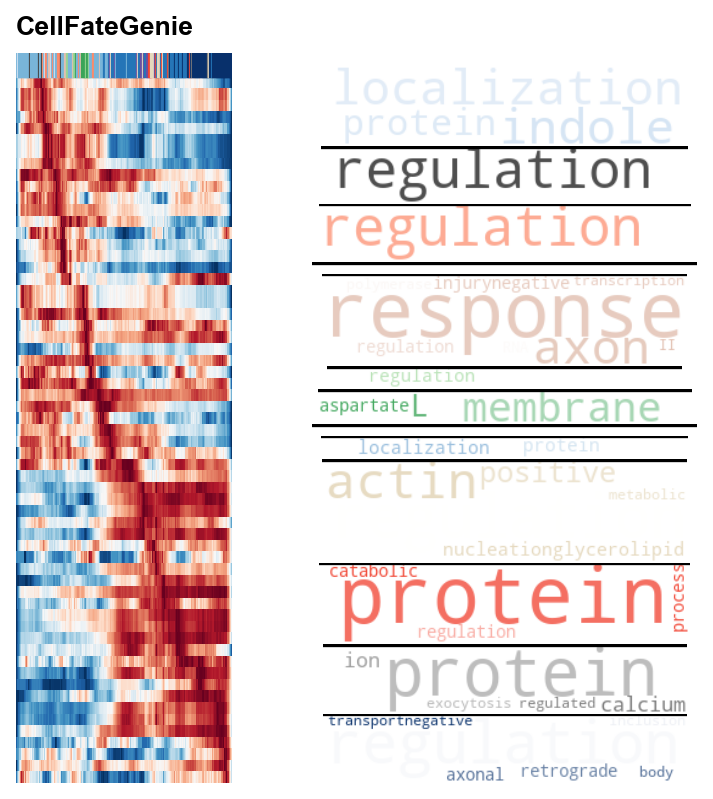

In [21]:
g=gw_obj1.plot_heatmap(figwidth=6,cmap='RdBu_r')
plt.suptitle('CellFateGenie',x=0.18,y=0.95,
               horizontalalignment='left',fontsize=12,fontweight='bold')
